In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
%matplotlib inline

# Link de descarga de los datos

https://drive.google.com/file/d/0B8VK9_Q95m8fclhlWVoxOWhGSWc/view

# Cargamos los datos

In [2]:
propertyD = pickle.load(open("../../../datos/Data.p","rb"))

Lo que queremos hacer es analizar la variacion de los precios de las propiedades, a lo largo del tiempo.
Entonces lo que vamos a hacer es ir agrupando las propiedades por meses y hacemos un promedio.

# Primero acomodo las fechas!

In [3]:
propiedades = propertyD[['id','created_on','price_aprox_usd','property_type']]

In [4]:
#Le agrego una columna que es el año
propiedades['year'] = propiedades['created_on']
propiedades['year'] = propiedades['year'].apply(lambda x: int(x[0:4]))

#Le agrego una columna que es el mes
propiedades['month'] = propiedades['created_on']
propiedades['month'] = propiedades['month'].apply(lambda x: int(x[5:7]))

/home/facundo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/facundo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/facundo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

# Ahora paso a separar las propiedades por años

In [5]:
prop2013 = propiedades[ propiedades['year'] == 2013 ]
prop2014 = propiedades[ propiedades['year'] == 2014 ]
prop2015 = propiedades[ propiedades['year'] == 2015 ]
prop2016 = propiedades[ propiedades['year'] == 2016 ]
prop2017 = propiedades[ propiedades['year'] == 2017 ]

# Ahora que las tenemos separadas por año, vamos a agrupar las propiedades de un año por mes

In [6]:
c2013 = prop2013[prop2013['property_type']=='house']
c2013 = c2013[['month','price_aprox_usd']].groupby('month').agg(np.mean)

c2014 = prop2014[prop2014['property_type']=='house']
c2014 = c2014[['month','price_aprox_usd']].groupby('month').agg(np.mean)

c2015 = prop2015[prop2015['property_type']=='house']
c2015 = c2015[['month','price_aprox_usd']].groupby('month').agg(np.mean)

c2016 = prop2016[prop2016['property_type']=='house']
c2016 = c2016[['month','price_aprox_usd']].groupby('month').agg(np.mean)

c2017 = prop2017[prop2017['property_type']=='house']
c2017 = c2017[['month','price_aprox_usd']].groupby('month').agg(np.mean)

In [7]:
d2013 = prop2013[prop2013['property_type']=='apartment']
d2013 = d2013[['month','price_aprox_usd']].groupby('month').agg(np.mean)

d2014 = prop2014[prop2014['property_type']=='apartment']
d2014 = d2014[['month','price_aprox_usd']].groupby('month').agg(np.mean)

d2015 = prop2015[prop2015['property_type']=='apartment']
d2015 = d2015[['month','price_aprox_usd']].groupby('month').agg(np.mean)

d2016 = prop2016[prop2016['property_type']=='apartment']
d2016 = d2016[['month','price_aprox_usd']].groupby('month').agg(np.mean)

d2017 = prop2017[prop2017['property_type']=='apartment']
d2017 = d2017[['month','price_aprox_usd']].groupby('month').agg(np.mean)

In [8]:
p2013 = prop2013[prop2013['property_type']=='PH']
p2013 = p2013[['month','price_aprox_usd']].groupby('month').agg(np.mean)

p2014 = prop2014[prop2014['property_type']=='PH']
p2014 = p2014[['month','price_aprox_usd']].groupby('month').agg(np.mean)

p2015 = prop2015[prop2015['property_type']=='PH']
p2015 = p2015[['month','price_aprox_usd']].groupby('month').agg(np.mean)

p2016 = prop2016[prop2016['property_type']=='PH']
p2016 = p2016[['month','price_aprox_usd']].groupby('month').agg(np.mean)

p2017 = prop2017[prop2017['property_type']=='PH']
p2017 = p2017[['month','price_aprox_usd']].groupby('month').agg(np.mean)

In [9]:
l=[1,2,3,4,5,6,7,8,9,10,11]

# Unimos los distintos tipos de propiedades en 1 Dataframe, para graficar

In [10]:
pro2013 = c2013
pro2013.columns = ['casas']
pro2013['deptos'] = d2013
pro2013['ph'] = p2013
pro2013.head(10)

,casas,deptos,ph
month,,,
5,201424.137931,145369.135135,122352.941176
6,310000.000000,90333.333333,NaN
7,187500.000000,128444.444444,NaN
8,145714.285714,67500.000000,50000.000000
9,169000.000000,73857.142857,NaN
10,282500.000000,87571.428571,103500.000000
11,184285.714286,100857.142857,92000.000000
12,110000.000000,107000.000000,NaN


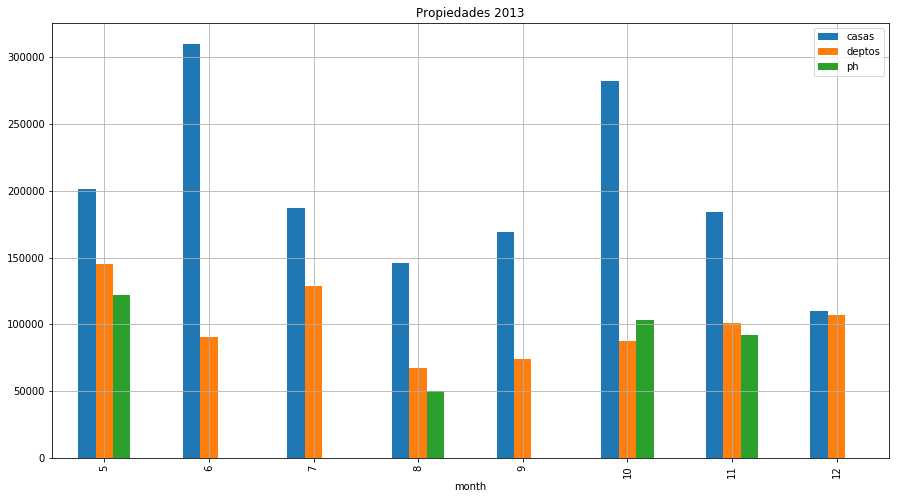

In [11]:
pro2013.plot(kind='bar',figsize=(15,8), title = 'Propiedades 2013', grid =True, xticks=l)

In [13]:
pro2014 = c2014
pro2014.columns = ['casas']
pro2014['deptos'] = d2014
pro2014['ph'] = p2014
pro2014.head(10)

,casas,deptos,ph
month,,,
1,180545.454545,147160.000000,240000.000000
2,142333.333333,472250.000000,NaN
3,184684.434730,138180.975562,109268.781212
4,226510.000000,159472.222222,79600.000000
5,295914.285714,195954.285714,86777.777778
6,214610.918324,152088.687456,191333.333333
7,239986.111111,201394.444444,100083.333333
8,215794.117647,199280.352903,100250.000000
9,273593.558437,107048.880889,87385.714286


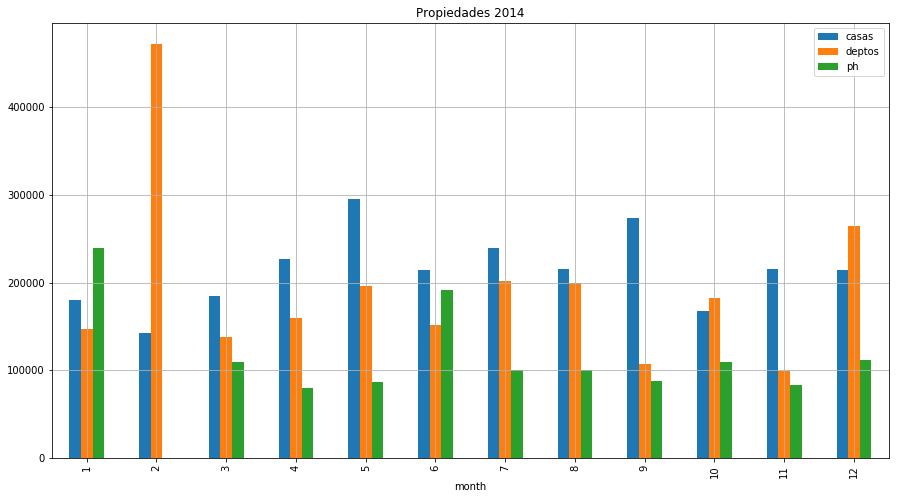

In [14]:
pro2014.plot(kind='bar',figsize=(15,8), title = 'Propiedades 2014', grid =True, xticks=l)

In [15]:
pro2015 = c2015
pro2015.columns = ['casas']
pro2015['deptos'] = d2015
pro2015['ph'] = p2015
pro2015.head(10)

,casas,deptos,ph
month,,,
1,326039.058824,398028.337079,80363.636364
2,185007.073171,115958.079469,164666.666667
3,592020.619335,168176.198217,173261.904762
4,476346.153846,180115.212785,109760.000000
5,390613.106076,183612.254472,158238.985294
6,436747.129903,364430.674407,106350.000000
7,282632.600000,150653.965877,113877.906977
8,357660.032478,167020.091134,94842.105263
9,344578.580929,139355.099876,100933.333333


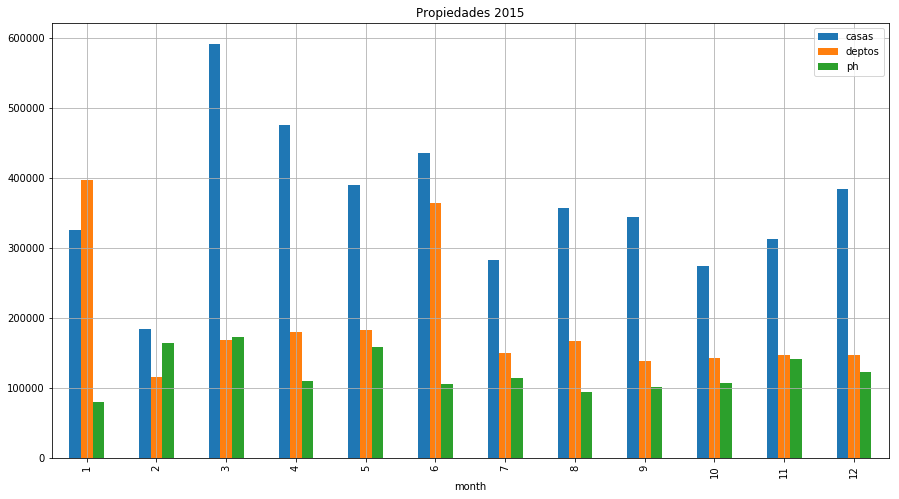

In [16]:
pro2015.plot(kind='bar',figsize=(15,8), title = 'Propiedades 2015', grid =True, xticks=l)

In [17]:
pro2016 = c2016
pro2016.columns = ['casas']
pro2016['deptos'] = d2016
pro2016['ph'] = p2016
pro2016.head(10)

,casas,deptos,ph
month,,,
1,352475.374000,185915.842788,136850.000000
2,373677.301801,251691.405847,131250.000000
3,366449.469500,156621.906678,117537.274462
4,388280.913522,173621.140640,416723.371373
5,275681.697613,137507.590399,114454.169302
6,423942.211738,197763.513159,133698.113208
7,435568.912074,169344.733657,160822.705102
8,400970.712439,183328.528552,140227.777778
9,386212.519091,195738.318282,135345.483902


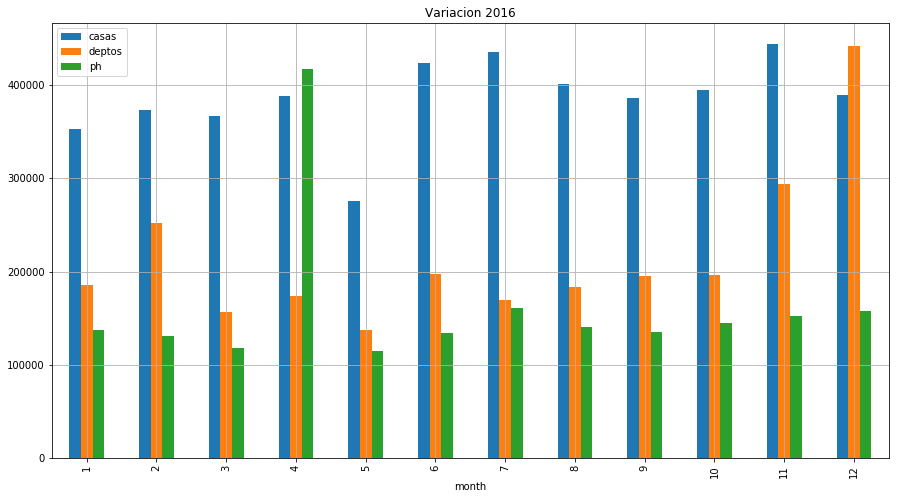

In [18]:
pro2016.plot(kind='bar',figsize=(15,8), title = 'Variacion 2016', grid =True, xticks=l)

In [19]:
pro2017 = c2017
pro2017.columns = ['casas']
pro2017['deptos'] = d2017
pro2017['ph'] = p2017
pro2017.head(10)

,casas,deptos,ph
month,,,
1,381505.969110,192963.266307,149989.132463
2,440079.555029,245050.278638,158616.501622
3,421812.576544,252624.431346,163787.016575
4,374893.754793,315001.667385,143533.712329
5,353015.478132,204680.126533,153429.213759
6,378450.619665,221311.986138,165670.224870
7,377055.595609,210240.942402,156919.049453
8,306709.677419,228663.923971,NaN


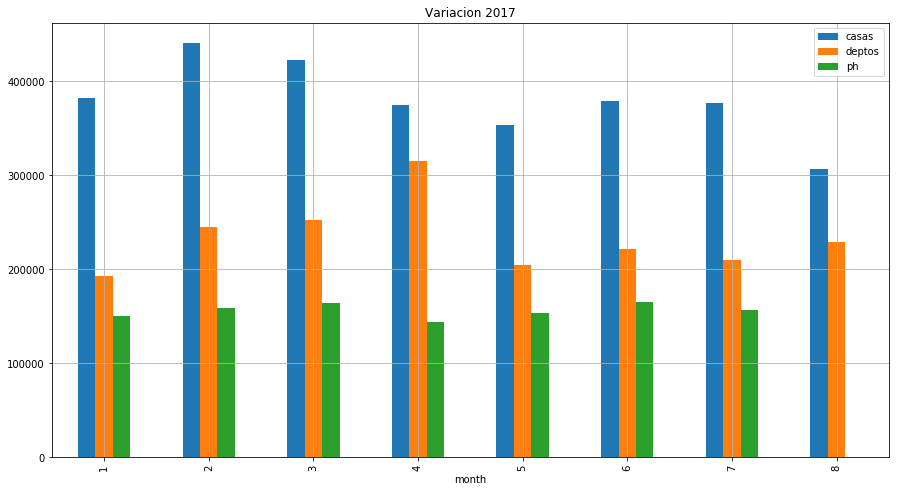

In [20]:
pro2017.plot(kind='bar',figsize=(15,8), title = 'Variacion 2017', grid =True, xticks=l)

# Ahora graficamos todos juntos

In [21]:
promC2013 = pro2013['casas'].mean()
promC2014 = pro2014['casas'].mean()
promC2015 = pro2015['casas'].mean()
promC2016 = pro2016['casas'].mean()
promC2017 = pro2017['casas'].mean()

In [22]:
promD2013 = pro2013['deptos'].mean()
promD2014 = pro2014['deptos'].mean()
promD2015 = pro2015['deptos'].mean()
promD2016 = pro2016['deptos'].mean()
promD2017 = pro2017['deptos'].mean()

In [23]:
promP2013 = pro2013['ph'].mean()
promP2014 = pro2014['ph'].mean()
promP2015 = pro2015['ph'].mean()
promP2016 = pro2016['ph'].mean()
promP2017 = pro2017['ph'].mean()

In [24]:
dic = {'casas' : [promC2013,promC2014,promC2015,promC2016,promC2017], 
       'deptos': [promD2013,promD2014,promD2015,promD2016,promD2017],
      'ph' : [promP2013,promP2014,promP2015,promP2016,promP2017]}

promedio = pd.DataFrame(dic)
promedio.rename(index={0:'2013',1:'2014',2:'2015',3:'2016',4:'2017'},inplace=True)
promedio.head(10)

,casas,deptos,ph
2013,198803.017241,100116.578400,91963.235294
2014,214294.815244,193226.553848,118129.961788
2015,363635.744142,192114.342696,122860.043929
2016,385971.043542,215366.433777,161741.621517
2017,379190.403288,233817.077840,155992.121581


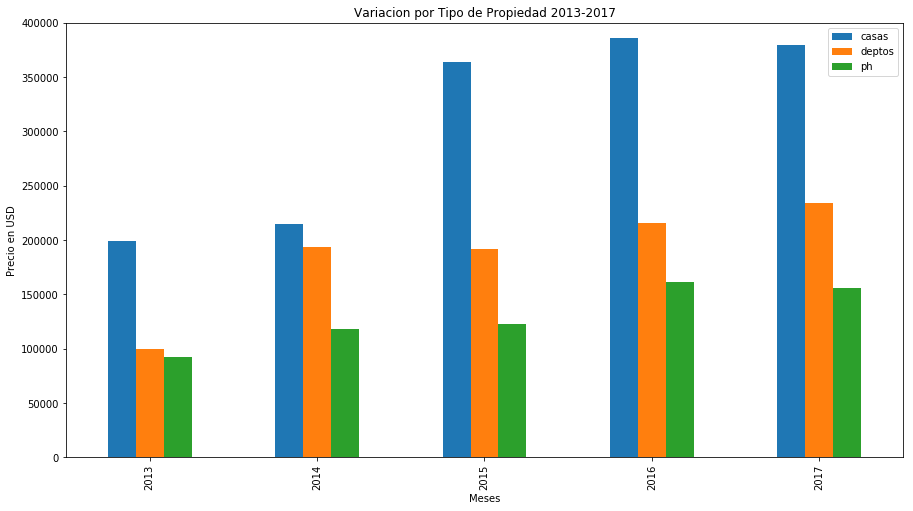

In [29]:
ax = promedio.plot(kind='bar',figsize=(15,8),xticks=l,\
                  title = 'Variacion por Tipo de Propiedad 2013-2017',linewidth=2,)
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 400000])
plt.show()
